In [1]:
# the bare minimum
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

In [2]:
import geopandas as gpd  # for geospatial data handling

In [3]:
import os
print(os.listdir())

['02_Geoprocessing.md', 'dataset1.ipynb', 'Assignments.md', 'dataprocessinghw.ipynb', '04_Networks.md', '03_Web_Mapping.md', '00_Getting_Started.md', 'assignment1.ipnyb', '01_Loading_Visualizing.md']


In [4]:
pluto = gpd.read_file("../Data/Food_Scrap_Drop-Off_Locations_in_NYC_20250710.csv", )

In [5]:
pluto.head()

,Borough,NTAName,SiteName,SiteAddr,Hosted_By,Open_Month,Day_Hours,Notes,Website,BoroCD,...,Object ID,Location Point,App Android,App iOS,Assembly District,Congress District,DSNY District,DSNY Section,DSNY Zone,Senate District
0,Brooklyn,Bay Ridge,4th Avenue Presbyterian Church,"6753 4th Avenue, Brooklyn, NY 11220",4th Avenue Presbyterian Church,Year Round,Every day (Start Time: Dawn - End Time: Dusk),"No meat, bones, or dairy.",,310,...,49584,POINT (-74.022767 40.635514),,,51,10,BKS10,BKS101,BKS,17
1,Manhattan,East Midtown-Turtle Bay,Dag Hammarskjold Plaza Greenmarket,E 47th St & 2nd Ave,GrowNYC,Year Round,Wednesday (Start Time: 8:00 AM - End Time: 12...,,grownyc.org/compost,106,...,49444,POINT (-73.969036 40.752606),,,74,12,MN06,MN063,MN,28
2,Manhattan,Hell's Kitchen,Hudson River Park's Pier 84 at W. 44th St.,Pier 84 at W. 44th St. near dog park,Staff at Hudson River Park,Year Round,Every day (Start Time: 7:00 AM - End Time: 7:...,,https://hudsonriverpark.org/the-park/sustainab...,104,...,49412,POINT (-74.00025 40.76346),,,67,12,MN04,MN043,MN,47
3,Manhattan,East Midtown-Turtle Bay,58th Street Library FSDO,127 East 58th Street,GrowNYC,Year Round,Wednesdays (Start Time: 7:30 AM - End Time: 1...,,grownyc.org/compost,105,...,49405,POINT (-73.9693 40.76198),,,73,12,MN05,MN052,MN,28
4,Manhattan,Tribeca-Civic Center,Tribeca Greenmarket,Greenwich St. & Duane St,GrowNYC,Year Round,Saturday (Start Time: 8:00 AM - End Time: 1:0...,,grownyc.org/compost,101,...,49317,POINT (-74.010793 40.717424),,,66,10,MN01,MN013,MN,27


In [6]:
pluto.columns

Index(['Borough', 'NTAName', 'SiteName', 'SiteAddr', 'Hosted_By', 'Open_Month',
       'Day_Hours', 'Notes', 'Website', 'BoroCD', 'CouncilDis', 'ct2010',
       'BBL', 'BIN', 'Latitude', 'Longitude', 'PolicePrec', 'Object ID',
       'Location Point', 'App Android', 'App iOS', 'Assembly District',
       'Congress District', 'DSNY District', 'DSNY Section', 'DSNY Zone',
       'Senate District'],
      dtype='object')

In [7]:
list(pluto.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

In [ ]:
# specifiying for the number of food drop-off sites that are open year-round versus seasonally

pluto.Open_Month.value_counts()

Open_Month
Year Round                      557
March - November                  6
April - October                   4
Seasonal                          3
April - November                  2
September - June                  2
Year Round (Except February)      2
April - August                    1
End of March - January 30         1
Closed during Winter              1
July - December                   1
July 14th-November 24th           1
June 11 - November 19             1
June 15-Oct 26                    1
May 1- November 1                 1
July - September                  1
July - November                   1
July- November 16                 1
June 25 - November 12             1
May - October                     1
April-November                    1
Spring - Fall                     1
Name: count, dtype: int64

In [9]:
pluto.Borough.value_counts()

Borough
Manhattan        251
Brooklyn         171
Bronx             75
Queens            75
Staten Island     19
Name: count, dtype: int64

In [12]:
# Now we only want the food scrap sites that are open year-round

pluto_year_round = pluto[pluto.Open_Month == "Year-Round"].copy()

In [ ]:
pluto.groupby("Open_Month").Borough.sum().sort_values(ascending=False)

Open_Month
September - June                                               Staten IslandBronx
June 11 - November 19                                               Staten Island
Closed during Winter                                                Staten Island
April - November                                                     QueensQueens
Year Round (Except February)                                       QueensBrooklyn
April - August                                                             Queens
July - November                                                            Queens
June 15-Oct 26                                                             Queens
July - December                                                            Queens
May - October                                                              Queens
May 1- November 1                                                       Manhattan
April-November                                                          Manhattan
Seaso

In [18]:
pluto.groupby("Open_Month").Borough.value_counts().sort_values(ascending=False)

Open_Month                    Borough      
Year Round                    Manhattan        248
                              Brooklyn         160
                              Bronx             68
                              Queens            66
                              Staten Island     15
March - November              Brooklyn           5
April - October               Brooklyn           3
April - November              Queens             2
May 1- November 1             Manhattan          1
Spring - Fall                 Bronx              1
September - June              Staten Island      1
                              Bronx              1
Seasonal                      Staten Island      1
                              Manhattan          1
                              Brooklyn           1
Year Round (Except February)  Brooklyn           1
April - August                Queens             1
March - November              Bronx              1
May - October                 Queens  

Text(0.5, 1.0, 'Distribution of Food Scrap Drop-off Sites by Borough')

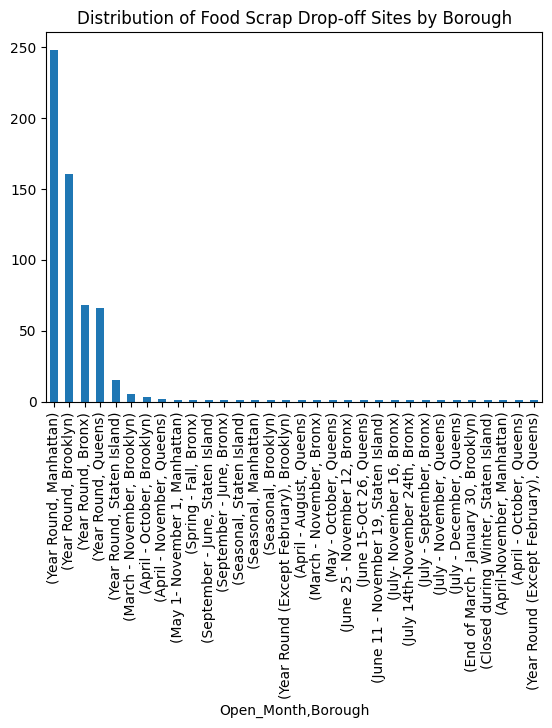

In [19]:
pluto.groupby("Open_Month").Borough.value_counts().sort_values(ascending=False).plot.bar()
plt.title("Distribution of Food Scrap Drop-off Sites by Borough")

KeyError: 'Open Month'

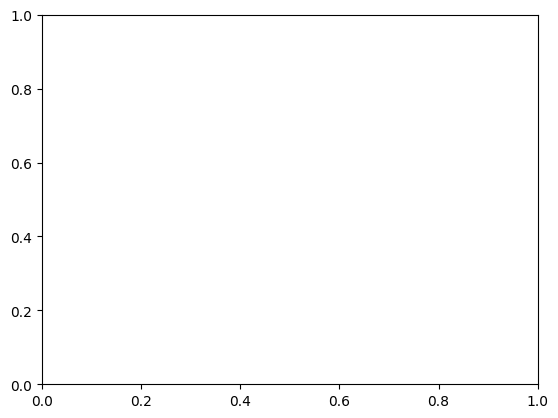

In [20]:
# plot both open month and borough count on the same plot with a secondary y-axis
fig, ax = plt.subplots()
by_lot_area = pluto.groupby("Open Month").Borough.value_counts().sort_values(ascending=False)

by_lot_area.plot.bar(ax=ax, color="light blue")

# get order to apply below
order = {v: i for i, v in enumerate(by_lot_area.index)}

ax.set_ylabel("Borough Count")
ax.set_xlabel("Day_Hours")

ax2 = ax.twinx()
pluto.groupby("Open Month").Borough.value_counts().reindex(by_lot_area.index).plot.bar(
    ax=ax2, edgecolor="black", color="none"
)
ax2.set_ylabel("Borough Count")

plt.title("Total Number of Food Scrap Drop Off Sites by Borough, Open Month and Day Hours")